# Theano

### Neural Networks in Python

#### Sarah Braden

#### 27 April 2016

#### DesertPy

In [4]:
from IPython.display import Image

## Theano 
* is a numerical computation library for Python
* lets you to define, optimize, and evaluate mathematical expressions
* uses a NumPy-like syntax
* can use g++ or nvcc to compile efficiently on either CPU or GPU architectures
* is primarily developed by a machine learning group at the Université de Montréal
* has a BSD license

## Theano is like a racecar

Theano can:

* attain speeds rivaling C implementations for problems involving large amounts of data
* surpass C on a CPU by many orders of magnitude by taking advantage of recent GPUs
* generate customized C code for many mathematical operations
* minimize the amount of compilation/analysis overhead

## Install
$ pip install theano

## Tutorials

* Basic Theano: http://deeplearning.net/software/theano/tutorial/
* Deep Learning Getting Started: http://deeplearning.net/tutorial/gettingstarted.html#gettingstarted
* Deep Learning: http://deeplearning.net/tutorial/
* Neural Network: http://outlace.com/Beginner-Tutorial-Theano/

Let's make sure Theano is working properly by running a computationally demanding deep learning example.

## Theano and Keras
* http://keras.io/
* Uses Theano as an underlying layer
* Treats the following as modules you can combine to create new models:
    * neural layers
    * cost functions
    * initialization schemes
    * regularization schemes

## Install Keras

On Mac make sure you have hdf5 installed first

`$ brew install homebrew/science/hdf5`

`$ pip install keras h5py`

## Deep Dreaming Example

Used for image recognition

Similar to the Google Deep Dream:
    http://deepdreamgenerator.com/
        
Example through the Keras repo:
    https://github.com/fchollet/keras/blob/master/examples/deep_dream.py

Download weights file:
    https://gist.github.com/baraldilorenzo/8d096f48a1be4a2d660d

#### Original Image vs. Google Deep Dream

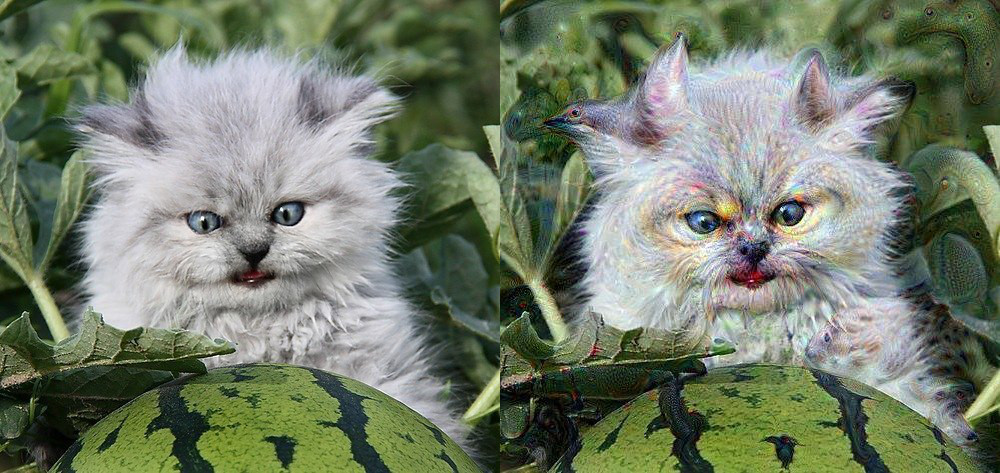

In [4]:
Image("img/cat_watermelon_compare.jpg")

#### Iterations using the Keras/Theano code and model

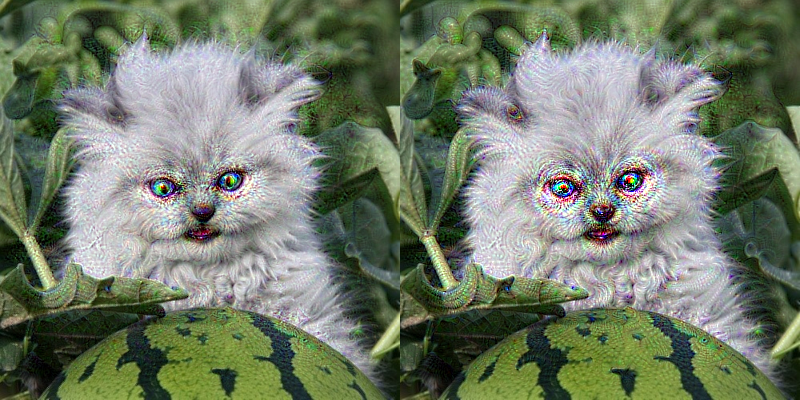

In [5]:
Image("img/dream_at_iteration_0_1.png")

Ok, so we got Theano and Keras installed, working, and did some weird shit.

Now let's go back to Theano basics!

### Theano Basics

Let's write code in Python that builds an expression for Theano. 

* declare symbols/variables and give their types
* build mathematical expressions using those variables
* compile expression graphs to functions so we can use them for computation

In [3]:
import theano
import theano.tensor as T

In Theano, all symbols must be typed.

T.dscalar is the type assigned to “0-dimensional arrays (scalar) of doubles (d)”.

In [5]:
# create variables representing floating-point scalars

x = T.dscalar('x')
y = T.dscalar('y')

#### Side Note

In [6]:
# T.dscalar is not a class. 
# Neither x nor y are actually instances of dscalar. 
# They are instances of TensorVariable. 

type(x)

theano.tensor.var.TensorVariable

In [7]:
# x and y are assigned the theano Type dscalar in their type field

x.type

TensorType(float64, scalar)

In [10]:
# create a simple expression

z = x + y

#### Pretty Print Side Note

Use `theano.pp` to pretty print out the computation associated with a variable.

In [14]:
print(theano.pp(z))

(x + y)


If you don't provide a string argument to your variables, the symbol will be unnamed. Names are not required, but can be useful for debugging.

In [ ]:
# declare two symbolic floating-point scalars
a = T.dscalar()
b = T.dscalar()

# create an expression
c = a + b

In [13]:
print(theano.pp(c))

(<TensorType(float64, scalar)> + <TensorType(float64, scalar)>)


#### Create a Function

In [15]:
f = theano.function([x, y], z)

Our function takes 2 arguments:

* a list of input variables `x` and `y`
* `z` as an ouput (can also be a list of variables)

The `theano.function` is the interface to a compiler which builds a callable object from a purely symbolic graph.

Behind the scene, `f` was being compiled into C code.

#### Call the function `f` to evaluate `c`

In [22]:
f(1.5, 2.5)

array(4.0)

### Matrix Addition

In [27]:
# declare variables
x = T.dmatrix('x')
y = T.dmatrix('y')

# write mathematical expression
z = x + y

# create a function
f = theano.function([x, y], z)

In [28]:
f([[1, 2], [3, 4]], [[10, 20], [30, 40]])

array([[ 11.,  22.],
       [ 33.,  44.]])

### Logistic Function

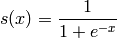

In [36]:
Image("img/logistic_function.png")

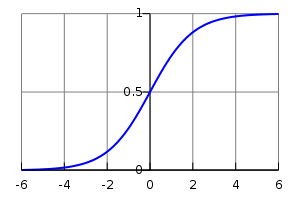

In [35]:
Image("img/logistic.png")

For this example, we want to compute the function elementwise on matrices of doubles, 
which means that we want to apply this function to each individual element of the matrix.

In [37]:
# declare variable
x = T.dmatrix('x')

# write mathematical expression
s = 1 / (1 + T.exp(-x))

# create a function
logistic = theano.function([x], s)

# evaluate
logistic([[0, 1], [-1, -2]])

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

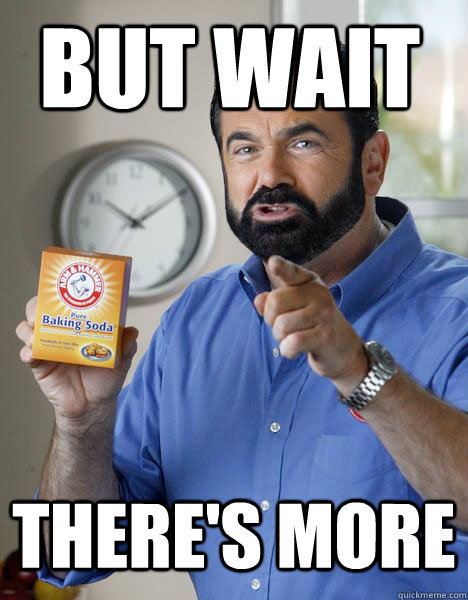

In [38]:
Image("img/butwait.jpg")

### Computing Many Things at the Same Time

In [39]:
# dmatrices produces as many outputs as names that you provide. 
# it is a shortcut for allocating symbolic variables
a, b = T.dmatrices('a', 'b')

diff = a - b
abs_diff = abs(diff)
diff_squared = diff**2

f = theano.function([a, b], [diff, abs_diff, diff_squared])

f([[1, 1], [1, 1]], [[0, 1], [2, 3]])

### Shared Variables

A shared variable is useful for things we want to give a definite value but we also want to update.

These are variables whose value may be shared between multiple functions and they have an internal value.

In [5]:
from theano import shared

# create a shared variable
state = shared(0)

inc = T.iscalar('inc')

accumulator = theano.function(
    [inc], 
    state,
    updates=[(state, state + inc)]
)

The value can be accessed and modified by the `.get_value()` and `.set_value()` methods. 

In [6]:
state.get_value()

array(0)

In [9]:
accumulator(1)
state.get_value()

array(1)

In [11]:
accumulator(300)
state.get_value()

array(301)

### Autodifferentiation

T.grad() will give us a symbolically differentiated expression of our function, then we pass it to `theano.function` to compile a new function to call it. 

This is pretty sweet.

Let use the following equation in this example:

$ f(x) = e^{sin{(x^2)}} $

In [43]:
x = T.dscalar()

# build the expression
fx = T.exp(T.sin(x**2))

# "compile" this expression into a Theano function
f = theano.function(inputs=[x], outputs=[fx])

f(10)

[array(0.602681965908778)]

In [44]:
# wrt stands for 'with respect to'
fp = T.grad(fx, wrt=x)

fprime = theano.function([x], fp)

fprime(15)

array(4.347404090286685)

## XOR Neural Network

#### What is a Neural Network?

* a collection of software “neurons” are created and connected together

* the network is asked to solve a problem, which it attempts to do over and over, each time strengthening the connections that lead to success and diminishing those that lead to failure.

Daniel Smilkov and Shan Carter at Google put together this interactive learner for how a neural network works: http://playground.tensorflow.org/

Each node represents an artificial neuron and an arrow represents a connection from the output of one neuron to the input of another.

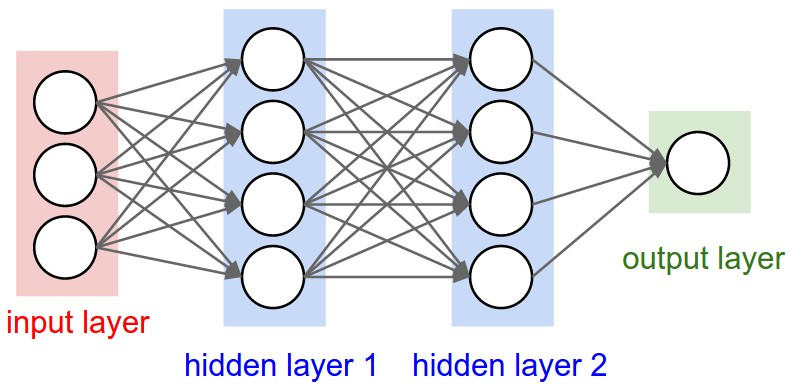

In [74]:
Image("img/neural_net2.jpeg")

#### What's an XOR Neural Network?

A neural network that will produce the following truth table, called the 'exclusive or' or 'XOR' (either A or B but not both):

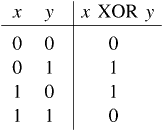

In [73]:
Image("img/xor-table.png")

In [1]:
import theano
import theano.tensor as T
import theano.tensor.nnet as nnet
import numpy as np

The x variable will be the input features, a 2-element vector, ex: [0, 1].

The y variable will be the labels (and eventually the output), a scalar, 0 or 1.

In [2]:
# symbolically define two Theano variables

x = T.dvector()
y = T.dscalar()

For each layer we need to define a Python function that will be a matrix multiplier and sigmoid function.

It will:

1. accept an x vector (and concatenate in a bias value of 1) and a w weight matrix
2. multiply them
3. run them through a sigmoid function 

Q: Why are we using a sigmoid function?

A: Sigmoid functions are often used in artificial neural networks to introduce nonlinearity.

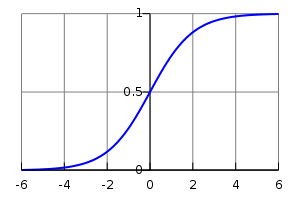

In [5]:
Image("img/logistic.png")

In [6]:
# basic layer output function

def layer(x, w):
    # b (the bias term)
    b = np.array([1], dtype='float64')
    # combines x and b into a tensor
    new_x = T.concatenate([x, b])
    # theta1: 3x3 * x: 3x1 = 3x1 ; theta2: 1x4 * 4x1
    # m is the dot product of the transpose of the weight and new_x
    m = T.dot(w.T, new_x)
    # create a sigmoid function
    h = nnet.sigmoid(m)
    return h

#### How will the neural network learn?

The neural net needs a function that gives feedback each time the neural net tries to give an output.

This function takes a cost/error expression and a weight matrix.

We will use Theano's `grad()` function to compute the gradient of the cost function with respect to the given weight matrix and return an updated weight matrix.

In [7]:
def grad_desc(cost, theta):
    # learning rate
    alpha = 0.1
    return theta - (alpha * T.grad(cost, wrt=theta))

### Define the weight matrices

Since the weight matrices will take on definite values, they're not going to be represented as Theano variables, they're going to be defined as Theano's shared variable.

In [8]:
# define the weight matrices and initialize them to random values

theta_1 = theano.shared(np.array(np.random.rand(3,3),dtype='float64'))

theta_2 = theano.shared(np.array(np.random.rand(4,1),dtype='float64'))

### Start computing each layer in the network

Start by computing the hidden layer's output using the previously defined `layer` function.

Pass in the Theano variable `x` and the theta_1 matrix (weights).

In [9]:
hidden_layer_1 = layer(x, theta_1)

output_layer_1 = T.sum(layer(hidden_layer_1, theta_2))

# declare our cost expression
cost_expression = (output_layer_1 - y)**2 

### Time to Compile!

In [10]:
# the cost expression for training

cost = theano.function(inputs=[x, y], outputs=cost_expression,
    updates=[
        (theta_1, grad_desc(cost_expression, theta_1)),
        (theta_2, grad_desc(cost_expression, theta_2))
    ])

# the output layer expression to run the network

run_forward = theano.function(inputs=[x], outputs=output_layer_1)

#### Remember Theano shared variables?

Updates allows us to update our shared variables according to an expression. 
updates expects a list of 2-tuples:
    
    updates=[(shared_variable, update_value), ...]
    
The second part of each tuple can be an expression or function that returns the new value we want to update the first part.

We have two shared variables we want to update, theta1 and theta2, and we want to use our gradient_descent function to give us the updated data. 

The gradient_descent function expects two arguments, a cost function and a weight matrix.

So every time we invoke/call the cost function that we've compiled with Theano, it will also update our shared variables according to our gradient_descent rule.

#### Define the training data

In [11]:
# training data X
inputs = np.array([[0, 1],[1, 0],[1, 1],[0, 0]]).reshape(4,2)

# training data Y
labels_y = np.array([1, 1, 0, 0])

In [12]:
#### Setup a for loop to iterate through the training epochs

In [13]:
cur_cost = 0
for i in range(10000):

    for k in range(len(inputs)):
        # call the Theano-compiled cost function, it will auto-update weights
        cur_cost = cost(inputs[k], labels_y[k])

    # only print the cost every 1000 epochs/iterations (to save space)
    if i % 1000 == 0:
        print('Cost: %s' % (cur_cost,))

Cost: 0.450344197495
Cost: 0.131175398493
Cost: 0.0339816822734
Cost: 0.0100899134867
Cost: 0.00419796098757
Cost: 0.00246249927827
Cost: 0.00169869648901
Cost: 0.0012825679369
Cost: 0.00102475142493
Cost: 0.000850819493948


### Does it work?

In [14]:
print(run_forward([0, 1]))
print(run_forward([1, 1]))
print(run_forward([1, 0]))
print(run_forward([0, 0]))

0.964960943766
0.0328625291814
0.977921860597
0.0269406923839


Questions?

Twitter: @ifmoonwascookie